<a href="https://colab.research.google.com/github/JavierFuenza/evaluacion2-ml/blob/Camilito/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

#Fase 1: COMPRESIÓN DEL NEGOCIO

## Descripción del juego
Counter-Strike (CSGO) es un videojuego de disparos en primera persona, que tiene dos equipos de 5 personas (Terroristas y Antiterroristas), cada uno con un proposito distinto, los terroristas tienen el objetivo de plantar una bomba, y los antiterroristas de impedir el plante de la bomba o desactivarla si fue plantada, ganando el mejor de 30 rondas (es decir con 16 rondas se gana la partida).

## Objetivo del modelo
El modelo tiene como objetivo predecir con el mayor nivel de precisión el desenlace de futuras partidas del juego para los 2 equipos (1 y 2) según que mapa sea.

<img src='https://images7.alphacoders.com/587/587593.png' width=50%, height=20%>

#Fase 2: COMPRESIÓN DE DATOS

In [47]:
#Importar las librerias necesarias para comprender y preparar los datos
import pandas as pd
import numpy as np
import seaborn as sb
from seaborn import boxplot
from seaborn import load_dataset
import matplotlib.pyplot as plt

In [ ]:
#Leer el archivo "RegistrosCSGO.xlsx"
from google.colab import files
uploaded = files.upload()
for i in uploaded.keys():
    name = i

#Lo asignamos a la variable df ya que lo que nos retornara es un DataFrame
# Intenta leer el archivo CSV especificando algunos parámetros adicionales
df = pd.read_excel(name)

Saving RegistrosCSGO.xlsx to RegistrosCSGO.xlsx


In [48]:
df.shape

(79157, 30)

Hay una matriz de datos con 79.157 registros correspondiente a 30 caracteristicas del juego.

In [ ]:
df.sample(10)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
40328,57750,de_inferno,CounterTerrorist,1,239,22,False,False,True,False,...,0,0,0,0,5700,29850,10,1,3,7
62904,99667,de_mirage,CounterTerrorist,2,411,3,True,True,False,False,...,0,0,0,0,200,1000,1,0,0,0
75012,119335,de_inferno,Terrorist,2,492,24,True,True,False,False,...,0,0,0,0,3550,21600,13,3,4,1
55061,83073,de_nuke,Terrorist,1,342,7,True,False,True,False,...,0,0,0,0,300,1300,3,0,0,1
14611,23892,de_dust2,Terrorist,1,100,6,False,False,False,False,...,1,0,0,0,6750,28600,5,1,1,2
72466,115249,de_dust2,CounterTerrorist,2,476,10,False,False,True,False,...,1,0,1,1,5600,26950,11,2,0,4
39486,56628,de_nuke,Terrorist,2,235,19,True,False,True,False,...,0,0,0,0,4700,23500,16,1,6,4
20579,31620,de_mirage,Terrorist,1,132,10,False,True,True,False,...,3,0,2,0,4400,16950,11,3,0,6
22531,33572,de_inferno,CounterTerrorist,1,140,15,False,True,False,False,...,0,0,0,0,900,4850,6,1,0,3
33776,48098,de_mirage,Terrorist,2,201,20,True,False,True,False,...,1,0,0,0,6850,25650,28,0,1,10


Asi se ve una muestra de 10 registros ramdom dentro de todo el conjunto de datos.

In [ ]:
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

Con las columnas nos damos cuenta que tenemos datos por **ronda de cada jugador** con:
* Varios Id para identificar a los equipos, la partida y la ronda.
* Booleanos para saber si gano cada ronda y cada partida.
* Datos de cada ronda de jugador para saber si sobrevivio, si tuvo una anormalidad en la ronda/partida (Desconexión de internet), tiempo que vivio, distancia recorrida.
* Que tipo de granadas y armas uso en cada ronda
* Cuantas Kills, Asistencias, Headshots y FlankKills tuvo por ronda y a la vez lo que va acumulando ronda a ronda en la partida.
* Cuanto gastaron de dinero por ronda para el equipamiento por jugador y por equipo en total.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  float64
 11  TravelledDistance            79157 non-null  float64
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

Esto nos muestra los tipos de datos que tenemos:
* 2 Booleanos (Categoricos Nominales)
* 7 Float64 (Numericos Continuos)
* 17 Int64 (Numericos Discretos)
* 4 Object (Categoricos Nominales)

In [ ]:
df.isna().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

En el conjunto de datos solo tenemos 3 nulos, 2 en la columna **Team** y 1 en la columna **MatchWinner**, que tendremos que tratar despues.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,6.057019e+04,3.643660e+04,600.0,3.083000e+04,5.672000e+04,9.063900e+04,1.237790e+05
InternalTeamId,79157.0,1.500006e+00,5.000032e-01,1.0,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
MatchId,79157.0,2.505250e+02,1.495578e+02,4.0,1.280000e+02,2.360000e+02,3.730000e+02,5.110000e+02
RoundId,79157.0,1.276552e+01,7.432837e+00,1.0,6.000000e+00,1.200000e+01,1.900000e+01,3.600000e+01
TimeAlive,79157.0,1.213404e+16,1.435118e+16,0.0,4.419176e+15,7.659978e+15,1.080375e+16,6.398288e+16
TravelledDistance,79157.0,1.207747e+16,1.286427e+16,0.0,5.222407e+15,8.770498e+15,1.323974e+16,6.668497e+16
RLethalGrenadesThrown,79157.0,4.986672e-01,5.979853e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
RNonLethalGrenadesThrown,79157.0,1.258057e+00,1.184909e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00
PrimaryAssaultRifle,79157.0,6.753631e-01,4.641251e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
PrimarySniperRifle,79157.0,8.984015e-02,2.797966e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


Las filas de conteo, media, mínimo y máximo se explican por sí mismas.

El std muestra la desviación estándar y las filas 25%, 50% y 75% muestran los percentiles correspondientes.

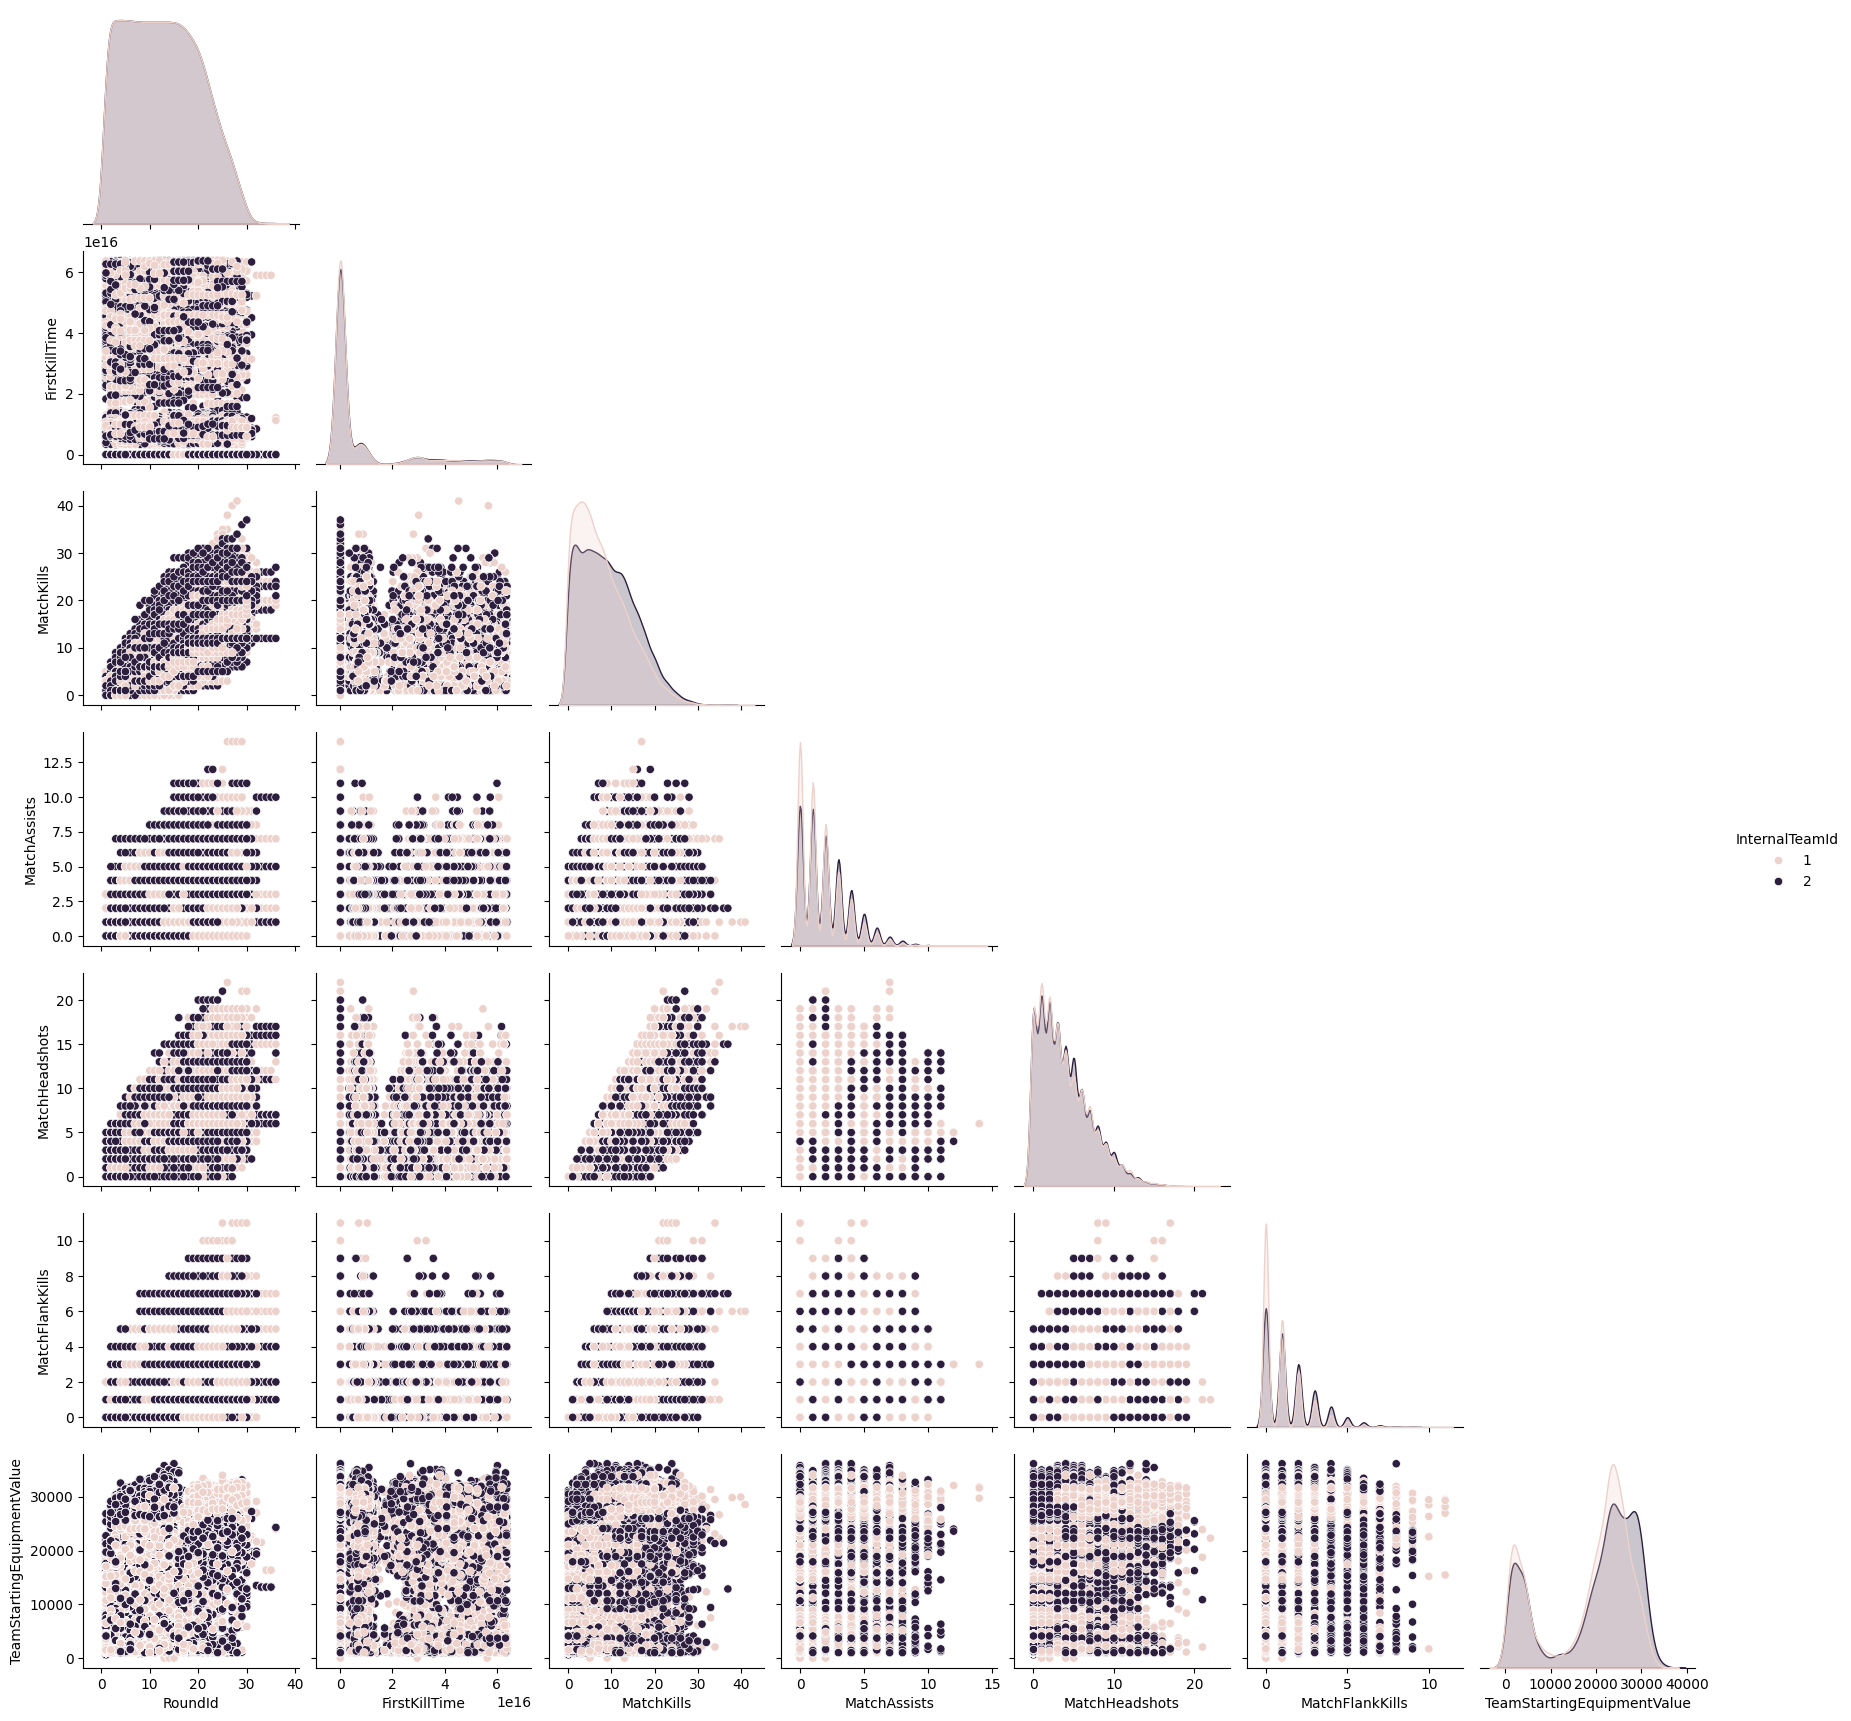

In [ ]:
sb.pairplot(df, vars = ["RoundId","FirstKillTime", "MatchKills","MatchAssists","MatchHeadshots","MatchFlankKills","TeamStartingEquipmentValue"], hue = "InternalTeamId", corner = True)

Con este analisis completo nos podemos dar cuenta que no hay muchas relaciones directas como uno podria esperarse, pero podemos notar que:
* El equipo 1 es mejor que el equipo 2 en varios graficos:
* Hay una relación entre el numero de la ronda y la cantidad de kills en la partida y lo mismo con los headshots con la cantidad de kills.

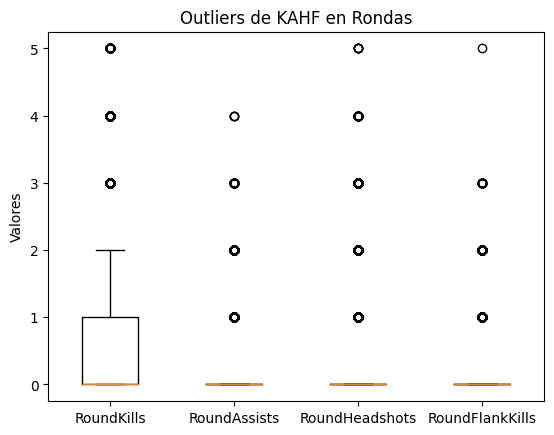

In [50]:
# Crear una figura y ejes
fig, ax = plt.subplots()

# Datos
data = [df['RoundKills'], df['RoundAssists'], df['RoundHeadshots'], df['RoundFlankKills']]

# Crear el gráfico de caja
ax.boxplot(data)

# Establecer etiquetas en el eje x
ax.set_xticklabels(['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills'])

# Título y etiquetas de los ejes
ax.set_title('Outliers de KAHF en Rondas')
ax.set_ylabel('Valores')

# Mostrar el gráfico
plt.show()

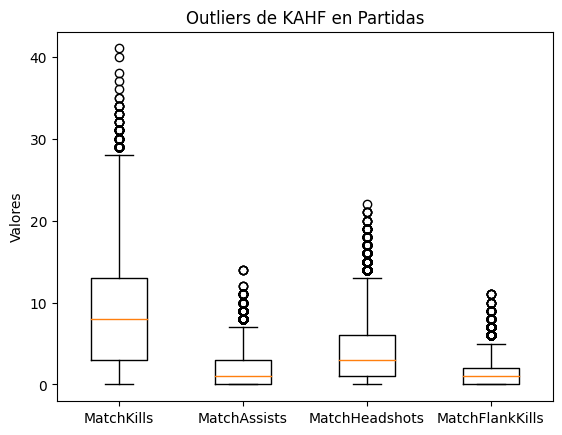

In [ ]:
# Crear una figura y ejes
fig, ax = plt.subplots()

# Datos
data = [df['MatchKills'], df['MatchAssists'], df['MatchHeadshots'], df['MatchFlankKills']]

# Crear el gráfico de caja
ax.boxplot(data)

# Establecer etiquetas en el eje x
ax.set_xticklabels(['MatchKills', 'MatchAssists', 'MatchHeadshots', 'MatchFlankKills'])

# Título y etiquetas de los ejes
ax.set_title('Outliers de KAHF en Partidas')
ax.set_ylabel('Valores')

# Mostrar el gráfico
plt.show()

In [ ]:
len(df.query('MatchKills>=28'))

275

<Axes: xlabel='MatchKills', ylabel='Count'>

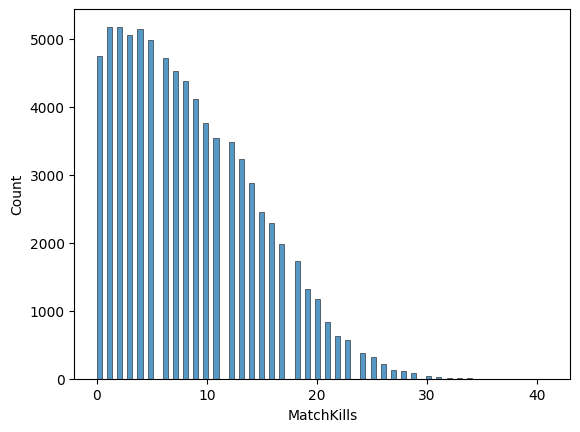

In [ ]:
sb.histplot(data=df, x="MatchKills")

<ipython-input-13-2eda52251a59>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['MatchKills'])


<Axes: xlabel='MatchKills', ylabel='Density'>

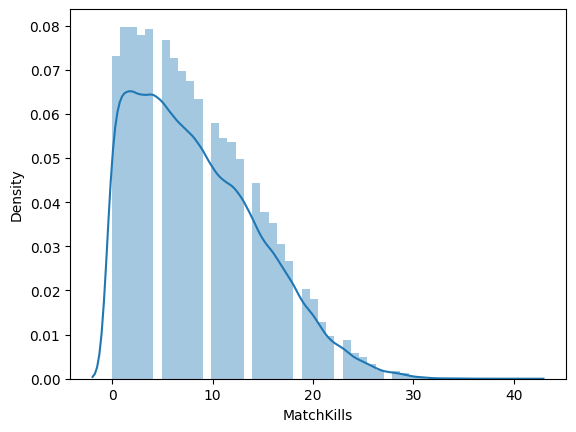

In [ ]:
sb.distplot(df['MatchKills'])

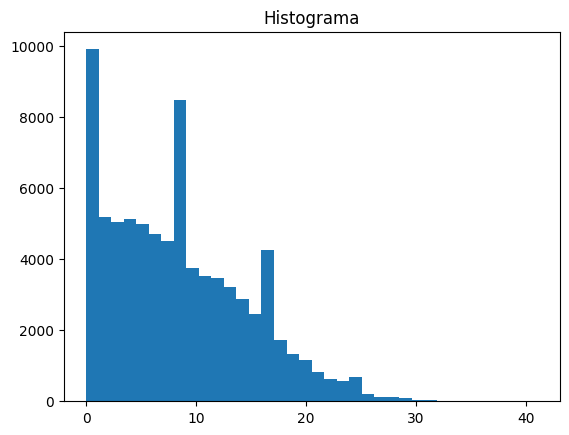

In [ ]:
plt.hist(df.MatchKills,bins = 36) # bins el numero de divisiones del histograma
plt.title("Histograma");

In [54]:
nombre = df['Map'].unique()
counts = df['Map'].value_counts()
nombre
counts

#plt.pie(exGru, labels=exgrupo)
#plt.show()

Map
de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: count, dtype: int64

#Fase 3: PREPARACIÓN DE DATOS